<a href="https://colab.research.google.com/github/dhruvipatel14/ApprochingMachineLearningProblems/blob/main/tSNE_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##t-SNE visualization of the MNIST dataset,By using 5000 images
<br>
t- SNE : t distributed stochastic neighbour embedding, It is dimentionality reduction technique.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn import datasets
from sklearn import manifold

### Importing MNIST dataset from sklearn databases

In [3]:
data = datasets.fetch_openml('mnist_784',version=1, return_X_y=True)
pixle_values, targets = data
targets = targets.astype(int)

/usr/local/lib/python3.6/dist-packages/sklearn/datasets/_openml.py:55: RuntimeWarning: Invalid cache, redownloading file
  warn("Invalid cache, redownloading file", RuntimeWarning)


In [5]:
pixle_values.shape

(70000, 784)

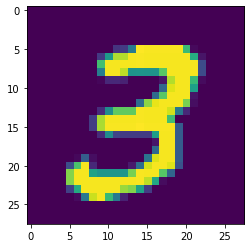

In [10]:
single_image = pixle_values[7,:].reshape(28,28)
plt.imshow(single_image)

Calculating t-SNE transformations

In [20]:
tsne = manifold.TSNE(n_components=2,perplexity=30,random_state=42)
transformed_data = tsne.fit_transform(pixle_values[:5000,:])

In [21]:
tsne_df = pd.DataFrame(np.column_stack((transformed_data,targets[:5000])),
                    columns = ["X","Y","targets"])
tsne_df.loc[:,"targets"] = tsne_df.targets.astype(int)
tsne_df.head()

,X,Y,targets
0,27.088566,-12.483382,5
1,4.760361,-76.225716,0
2,62.843925,15.778657,4
3,-41.706882,40.620762,1
4,26.070206,27.240562,9


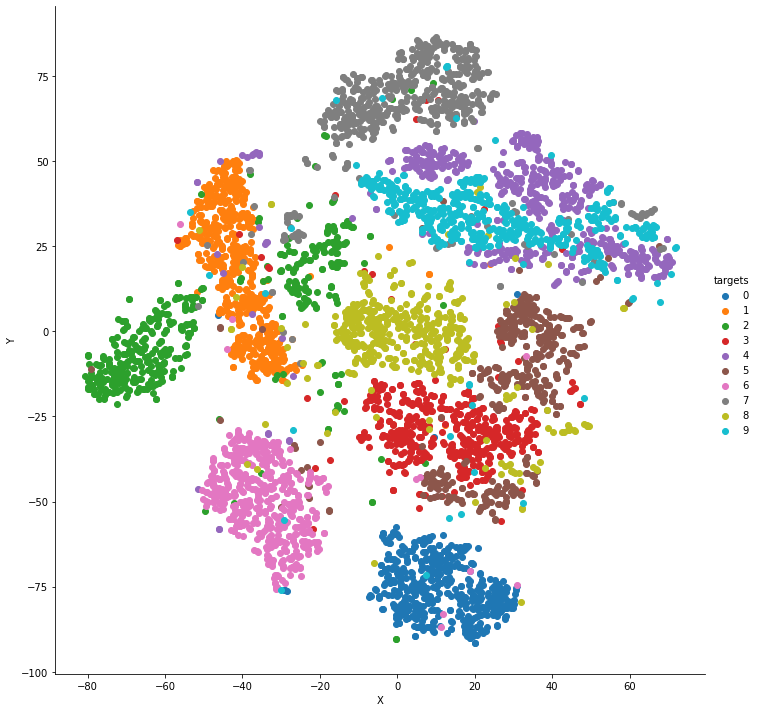

In [22]:
grid = sns.FacetGrid(tsne_df,hue = "targets",height= 10)
grid.map(plt.scatter,"X","Y").add_legend()